# CMPINF-0010 Final Project (The Foodies)

## Introduction - The Metric
Our overall metric for finding the "best" neighborhood in Pittsburgh is determining which neighborhood has the best food, so access to groceries plays an important role. Beyond just the number of grocery/convenience stores in a neighborhood (which can be affected by land area), I'll examine the density to determine which neighborhood's residents have the most accessible groceries near where they live.

## My Sub-metric: Density of convenience stores (food deserts)

![community mart](https://static.timesofisrael.com/jewishchronicle/uploads/2021/09/image_6487327-640x400.jpg)

## Goal of my analysis:
My sub-metric is density of grocery/convenience stores. Food deserts present a major challenge in low-income communities, so I want to know which neighborhoods are most/least affected by this phenomenon. Along the way, I'll determine which neighborhood has the most access to local groceries as well as which neighborhoods are overlooked (and the socioeconomic factors that explain why).

## My Dataset
Title: Allegheny County Supermarkets & Convenience Stores
Description: This dataset lists the name, address, coordinates, and type (either grocery or convenience store) of food locations in Allegheny County.

Link: https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores

## Data Preview:

In [72]:
import pandas as pd

file_name = "data/conveniencesupermarket.csv"
data = pd.read_csv(file_name)
data.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


### The Best Neighborhood (In terms of my sub-metric)

First, let's simply the above dataset to only include the columns we care about. Namely, we want our simplified dataset to include longitude, latitude, and category (since the specific names aren't as important).

In [73]:
# Gets certain columns for larger dataset
simpData = data[['Lat', 'Lon', 'Category']]
simpData.head(10)

,Lat,Lon,Category
0,40.495759,-80.066508,Convenience Store
1,40.545418,-80.194152,Convenience Store
2,40.510522,-80.094268,Convenience Store
3,41.203322,-77.194525,Convenience Store
4,40.553281,-80.109158,Convenience Store
5,40.367923,-79.780429,Convenience Store
6,40.494177,-80.267208,Convenience Store
7,40.370214,-79.913195,Convenience Store
8,40.440641,-80.149132,Convenience Store
9,40.529076,-80.025577,Convenience Store


Now we want to count the number of convenience/grocery stores in each neighborhood. To do so, we'll need to import the geometric data that describes neighborhood shape/location using geopandas:

In [74]:
import geopandas as gpd

# Imports neighborhood shape data
neighborhoods = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.head(2)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."


Let's simplify this dataset so we're able to count the number of grocery/convenience stores in each neighborhood:

In [75]:
# Define new dataset for counting
numEach = pd.DataFrame(columns = ['Neighborhood', 'Shape', 'Area', 'ConvenienceCount', 'GroceryCount'])

numEach["Neighborhood"] = neighborhoods["hood"]
numEach["Shape"] = neighborhoods["geometry"]
numEach["Area"] = 0
numEach["ConvenienceCount"] = 0
numEach["GroceryCount"] = 0

for i, hood in numEach.iterrows():
    numEach.at[i, "Area"] = numEach.at[i, "Shape"].area * 100000

numEach.head()

,Neighborhood,Shape,Area,ConvenienceCount,GroceryCount
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0,0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,0,0
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,0,0
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0,0
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,0,0


Although the Shapley.area method doesn't return the area in a useful unit like m^2 or km^2, it still preserves the ratios between areas, so we multiply by a large constant to make the area values feel more natural.

We want to combine the information from our simpData (convenience/grocery store location info) and numEach (neighborhood name and geometric info) datsets. To do this, we'll use the ``Polygon.contains(Point)`` method since our geometric neighborhood data uses Polygon objects.

In [76]:
# Import the Point class so we can make use of Longitude and Latitude data from our simpData dataset:
from shapely.geometry import Point

count = 0
hitscount = 0
convenienceCount = 0
supermarketCount = 0

for i, store in simpData.iterrows():
    # Store the longitude and latitude data in a Point Object
    pt = Point(store["Lon"], store["Lat"])
    count += 1
    
    # Now iterate through numEach dataset and increment counter accordingly
    for j, hood in numEach.iterrows():
        if hood["Shape"].contains(pt):
            hitscount += 1
            if store["Category"] == "Convenience Store":
                numEach.at[j, 'ConvenienceCount'] = numEach.at[j, 'ConvenienceCount'] + 1
            elif store["Category"] == "Supermarket":
                supermarketCount += 1
                numEach.at[j, 'GroceryCount'] = numEach.at[j, 'GroceryCount'] + 1
                
print(count)
print(hitscount)
numEach.head()

672
190


,Neighborhood,Shape,Area,ConvenienceCount,GroceryCount
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,5,1
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,4,1
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,1,0
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,3,1
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,5,4


All that's left is to divide the convenience/grocery store counts by the neighborhood area and do a final ordering in order to determine the neighborhood with the best density of each:

In [77]:
for i, neighborhood in numEach.iterrows():
    numEach.at[i, "ConvenienceCount"] = numEach.at[i, "ConvenienceCount"] / numEach.at[i, "Area"]
    numEach.at[i, "GroceryCount"] = numEach.at[i, "GroceryCount"] / numEach.at[i, "Area"]
    
numEach.columns = ['Neighborhood', 'Shape', 'Area', 'Convenience Density', 'Grocery Density']
    
numEach.head()

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0.646455,0.129291
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,0.291667,0.072917
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,0.169039,0.000000
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0.422291,0.140764
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,0.299079,0.239263


We want to separately consider the orderings of neighborhoods based on number of convenience stores and grocery stores respectively:

In [78]:
convenience_sorted = numEach.sort_values("Convenience Density", ascending=False)
grocery_sorted = numEach.sort_values("Grocery Density", ascending=False)

convenience_sorted.head()

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
5,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",17.599559,0.965933,0.000000
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0.646455,0.129291
28,East Allegheny,"POLYGON ((-79.99488 40.45930, -79.99521 40.458...",6.490905,0.462185,0.154062
16,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",9.000523,0.444419,0.000000
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0.422291,0.140764


Here is some simple visualization of the results using bar graphs:

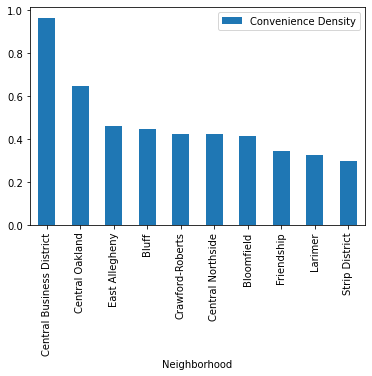

In [79]:
topConvenience = convenience_sorted[0:10]
topConvenience.plot.bar("Neighborhood", "Convenience Density")

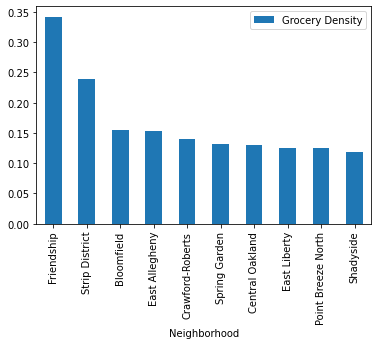

In [80]:
topGrocery = grocery_sorted[0:10]
topGrocery.plot.bar("Neighborhood", "Grocery Density")

## Conclusion / Analysis
The above graph shows the results of my analysis. In particular, we're going to use grocery store/supermarket density (rather than convenience store density) in comparsion with our other sub-metrics in order to determine the best neighborhood in Pittsburgh. The reason for this decision is that supermarket density is most directly related to access to fresh food/produce whereas convenience store density doesn't carry the same significance. In fact, the neighborhoods that we might consider to be 'food deserts' may very well have a high convenience store density. What makes then food deserts is the lack of fresh food/produce within a reasonable distance, not a lack of convenience stores to buy scratch-off tickets.

### A brief detour

In addition to the neighborhood with the best access to fresh food, we also want to consider the neighborhoods with the least access:

In [81]:
grocery_sorted = numEach.sort_values("Grocery Density", ascending=True)
grocery_sorted.head(10)

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
44,North Shore,"POLYGON ((-79.99508 40.45000, -79.99535 40.449...",8.348234,0.000000,0.0
62,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",10.542279,0.094856,0.0
61,Polish Hill,"POLYGON ((-79.96779 40.46085, -79.96716 40.460...",7.001632,0.142824,0.0
60,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",20.641120,0.000000,0.0
59,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",30.736530,0.000000,0.0
58,Allegheny Center,"POLYGON ((-80.00149 40.45270, -80.00146 40.452...",5.752002,0.000000,0.0
57,Knoxville,"POLYGON ((-79.98806 40.41592, -79.98797 40.414...",8.290178,0.241249,0.0
55,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",16.673954,0.059974,0.0
63,Arlington Heights,"POLYGON ((-79.96027 40.41810, -79.96023 40.418...",3.615556,0.000000,0.0
54,Allegheny West,"POLYGON ((-80.01457 40.45397, -80.01453 40.453...",3.884963,0.000000,0.0


Why are there so many neighborhoods with a grocery density of 0? Excluding the neighborhoods that are simply too small, we see neighborhoods like Brighton Heights with a massive area and not a single grocery store/supermarket. These neighborhoods are often referred to as 'food deserts' because they lack reasonable access to fresh produce and non-fast food options (The USDA uses a slightly different and more precise definition). Oftentimes, neighborhoods become food deserts due to low inocme levels, poverty, poor transportation, and other socioeconomic factors. A further area of research would be to look at other datasets that may help to explain the patterns found in my analysis of grocery/supermarket density.